<a href="https://colab.research.google.com/github/ifkmldk/portfolio/blob/main/Tritronik_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Importing Libraries**

In [93]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
from scipy.optimize import curve_fit

---
**Insert Dataset into Dataframe**

In [ ]:
df = pd.DataFrame({
    'Avg_Daily_Rainfall (mm)': [22, 12, 28, 25, 35, 38, 15, 10, 5, 62, 24, 7, 8, 4, 3],
    'Daily_Fish_Catch': [4000, 10000, 1000, 8000, 800, 200, 9000, 12000, 38000, 100, 5000, 30000, 29000, 12000, 40000]
})

---
**Sorting the Data**

In [95]:
df = data.sort_values(by='Avg_Daily_Rainfall (mm)')
print(df)

    Avg_Daily_Rainfall (mm)  Daily_Fish_Catch
14                        3             40000
13                        4             12000
8                         5             38000
11                        7             30000
12                        8             29000
7                        10             12000
1                        12             10000
6                        15              9000
0                        22              4000
10                       24              5000
3                        25              8000
2                        28              1000
4                        35               800
5                        38               200
9                        62               100


---
**Instant EDA to Preview the Data**

In [ ]:
pip install pandas-profiling

In [97]:
from pandas_profiling import ProfileReport

In [98]:
profile = ProfileReport(data,
  title = "Pandas Profiling Report",
  correlations = {
    "pearson": {"calculate": False},
    "spearman": {"calculate": False},
    "kendall": {"calculate": True},
    "cramers": {"calculate": False},
    "phi_k": {"calculate": False},
    "auto": {"calculate": False}
  },
)
profile.to_widgets()

/usr/local/lib/python3.10/dist-packages/pandas_profiling/profile_report.py:457: UserWarning: Ipywidgets is not yet fully supported on Google Colab (https://github.com/googlecolab/colabtools/issues/60).As an alternative, you can use the HTML report. See the documentation for more information.
  warnings.warn(


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render widgets:   0%|          | 0/1 [00:00<?, ?it/s]

---
**Visualizing The Data Distribution Using Box Plot**

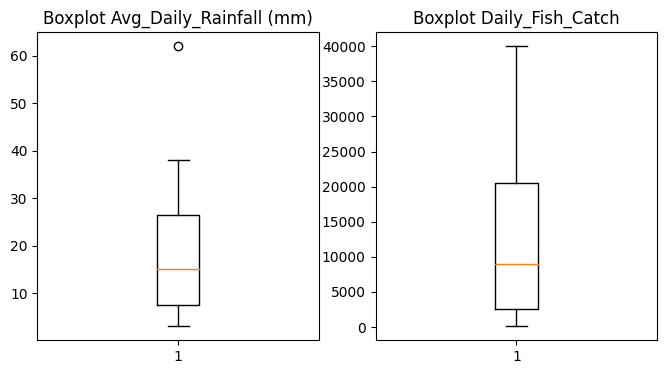

In [99]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4))

ax1.boxplot(data['Avg_Daily_Rainfall (mm)'])
ax1.set_title('Boxplot Avg_Daily_Rainfall (mm)')

ax2.boxplot(data['Daily_Fish_Catch'])
ax2.set_title('Boxplot Daily_Fish_Catch')

plt.show()

---
**Correlation Test Using Kendall Correlation**

Kendall correlation is used for assessing the relationship between two datasets, especially when these datasets lack normality or lack monotonicity. Additionally, the presence of outliers or extreme values, as hinted by the box plot, underscores the need for this robust correlation method.

In [100]:
correlation_coefficient, pValue = stats.kendalltau(data['Avg_Daily_Rainfall (mm)'], data['Daily_Fish_Catch'])
print(f'Correlation Coefficient (r): {correlation_coefficient:.3f}')
print(f'p-value : {pValue:.3f}')

Correlation Coefficient (r): -0.880
p-value : 0.000


Based on the results, we can make the following conclusions:
1. The observed correlation (r) of -0.880 is greater in magnitude than the critical value (r-table) of 0.514 for a sample size of 15 (df = N - 2).
(This indicates a statistically significant negative correlation.)

2. The p-value of 0.000 is less than the significance level of 0.05.
(This implies that we can reject the null hypothesis.)

3. Referring to the "Guidelines for Degree of Association in Correlation Testing," a correlation of -0.880 indicates a very strong negative relationship between **average_daily_rainfall (mm)** and **daily_fish_catch**.
(This suggests that as the **average daily rainfall increases**, the **daily fish catch tends to decrease significantly**.)

---
**Visualizing The Data Correlation Using Scatter Plot**

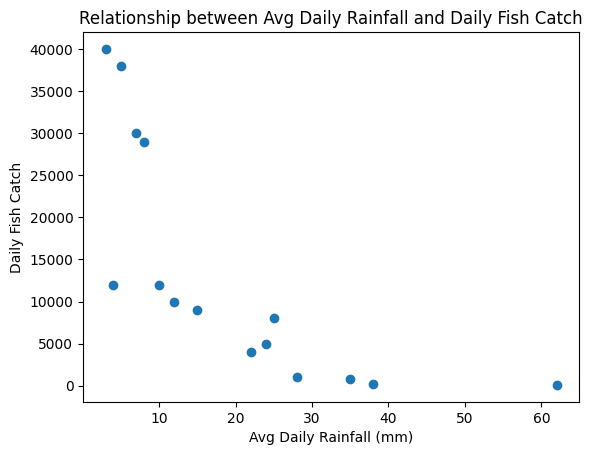

In [101]:
plt.scatter(data['Avg_Daily_Rainfall (mm)'], data['Daily_Fish_Catch'])
plt.xlabel('Avg Daily Rainfall (mm)')
plt.ylabel('Daily Fish Catch')
plt.title('Relationship between Avg Daily Rainfall and Daily Fish Catch')
plt.show()

---
**Regression Analysis**

In [102]:
x = np.array(df['Avg_Daily_Rainfall (mm)'])
y = np.array(df['Daily_Fish_Catch'])

In [103]:
def exponential_model(x, a, b):
    return a * np.exp(-b * x)

In [ ]:
params, covariance = curve_fit(exponential_model, x, y)
a, b = params

In [105]:
print(f"Regression Equation: \nDaily_Fish_Catch = {a:.3f}^(-{b:.3f} * Avg_Daily_Rainfall (mm))")

Regression Equation: 
Daily_Fish_Catch = 46442.910^(-0.098 * Avg_Daily_Rainfall (mm))


---
**Visualizing Regression Model**

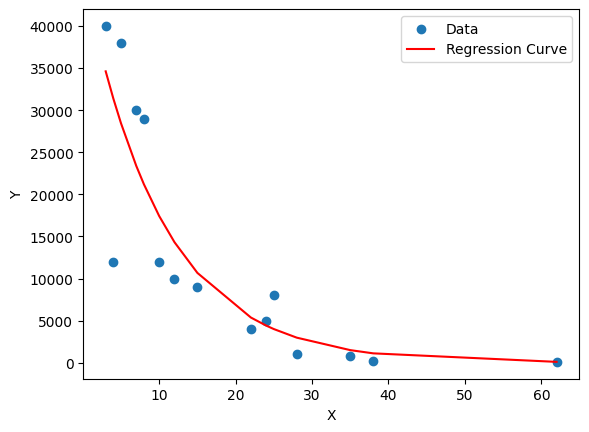

In [106]:
plt.scatter(x, y, label='Data')
plt.plot(x, exponential_model(x, a, b), 'r-', label='Regression Curve')
plt.legend()
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

---
**CONCLUSION**

The analysis utilizing the **Kendall Tau Method** reveals a robust **negative correlation** between the **average daily rainfall** and **the Daily Fish Catch**. Additionally, the scatter plot visualization suggests that the relationship is likely described by a **non-linear, negative exponential equation**. As a result, the regression equation derived from the analysis is as follows:

**Daily_Fish_Catch = 46442.910^(-0.098 * Avg_Daily_Rainfall (mm))**